<a href="https://colab.research.google.com/github/tedrosredie/PyhonProjects/blob/main/DDS8555_Applied_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Load and prepare data
df = pd.read_csv('/content/sample_data/Auto.csv', na_values='?')
df = df.dropna(subset=['horsepower'])
df['horsepower'] = df['horsepower'].astype(float)


In [12]:
# Create feature matrix and target vector
X = df[['horsepower']].values
y = df['mpg'].values

In [13]:
# Generate prediction grid
x_grid = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

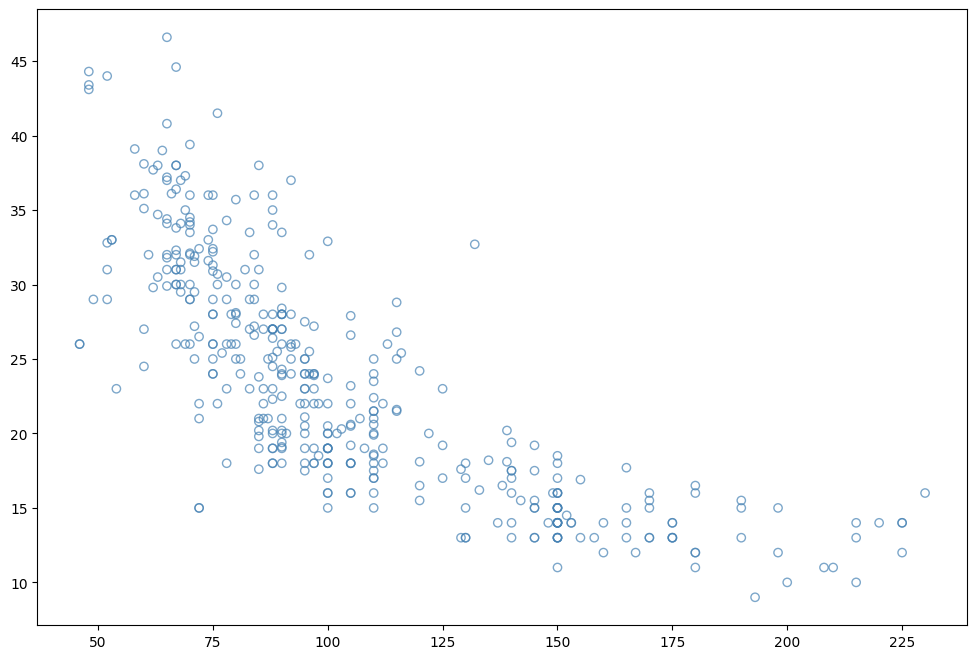

In [14]:
# Initialize plot
plt.figure(figsize=(12,8))
plt.scatter(X, y, facecolor='none', edgecolor='steelblue', alpha=0.7, label='Observed Data')

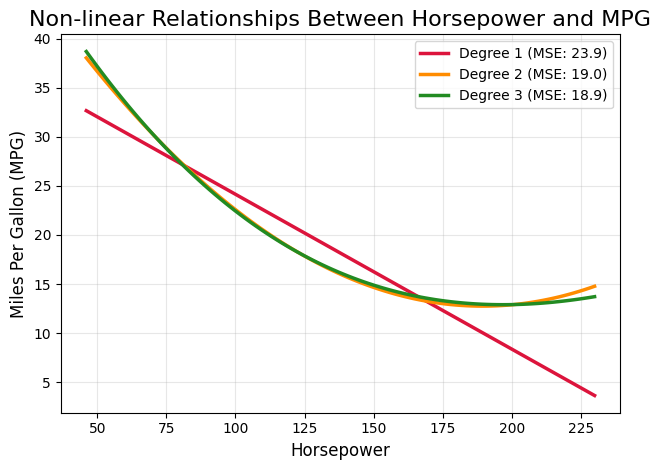

In [17]:
# Fit and plot models
degrees = [1, 2, 3]
colors = ['crimson', 'darkorange', 'forestgreen']
models = []

for degree, color in zip(degrees, colors):
    # Create polynomial regression pipeline
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )

    # Fit model
    model.fit(X, y)
    models.append(model)

    # Calculate predictions
    y_pred = model.predict(x_grid)

    # Calculate MSE
    mse = mean_squared_error(y, model.predict(X))

    # Plot results
    plt.plot(x_grid, y_pred, color=color, lw=2.5,
             label=f'Degree {degree} (MSE: {mse:.1f})')
  # Format plot
plt.title('Non-linear Relationships Between Horsepower and MPG', fontsize=16)
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Quantitative comparison
results = []
for degree, model in zip(degrees, models):
    y_pred = model.predict(X)
    results.append({
        'Degree': degree,
        'MSE': mean_squared_error(y, y_pred),
        'R²': model.score(X, y)
    })

pd.DataFrame(results).set_index('Degree')


,MSE,R²
Degree,,
1,23.943663,0.605948
2,18.984769,0.687559
3,18.944990,0.688214
